In [1]:
import sys
sys.path.append("../")

import numpy as np
import pylab as plt
import matplotlib
from matplotlib import cm

from src.models import *
from src.utils import *

In [2]:
net = torch.load('../workspace/checkpoints/ConvAutoencoderSubPixel_1.pt')

In [3]:
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.CIFAR10(root='../datasets/', train=True, download=True, transform=transform)

Files already downloaded and verified


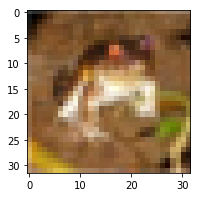

In [4]:
plt.figure(figsize=(3,3))
plt.imshow(trainset[0][0].permute(1,2,0).numpy())
plt.show()

In [5]:
code = net.encoder(trainset[0][0].reshape((1,3,32,32)).cuda())

In [6]:
code.flatten()

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0', grad_fn=<AsStridedBackward>)

In [7]:
img = net.decoder(code)

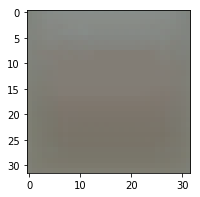

In [8]:
plt.figure(figsize=(3,3))
plt.imshow(img[0].permute(1,2,0).cpu().detach().numpy())
plt.show()